# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

* Determine if polynomial regression would be useful for a specific model or set of data
* Create polynomial terms out of independent variables in linear regression

## Dataset

For this lab you'll be using some generated data:

In [56]:
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/bmjaron/dsc-polynomial-regression-lab-v2-5/master/sample_data.csv')
df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Let's check out a scatter plot of `x` vs. `y`: 

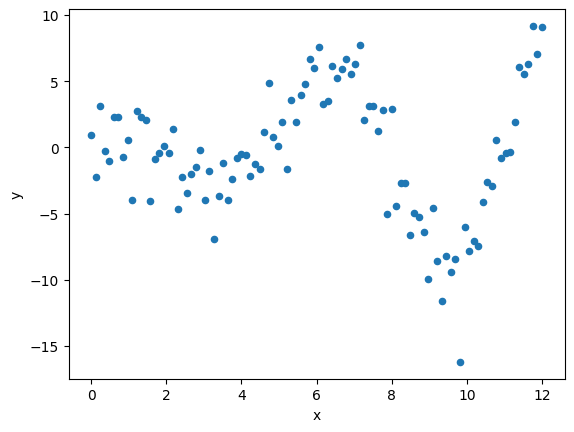

In [57]:
# Run this cell without changes
df.plot.scatter(x="x", y="y");

You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

You will fit several different models with different polynomial degrees, then plot them in the same plot at the end.

In [58]:
# Your code here - import StatsModels and separate the data into X and y
import statsmodels.api as sm

x = df[["x"]]
y = df["y"]


## Build and Evaluate a Quadratic Model

This model should include a constant, `x`, and `x` squared. You can use `pandas` or `PolynomialFeatures` to create the squared term.

In [63]:
# Your code here - prepare quadratic data and fit a model

x_2 = x.copy()
x_2['x^2'] = x_2['x']**2

results_2 = sm.OLS(y, sm.add_constant(x_2)).fit()


In [64]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values

results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2366
Date:                Sun, 30 Apr 2023   Prob (F-statistic):              0.790
Time:                        18:30:18   Log-Likelihood:                -299.64
No. Observations:                 100   AIC:                             605.3
Df Residuals:                      97   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1127      1.446      0.078      0.938      -2.757       2.983
x             -0.0744      0.557     -0.134      0.894      -1.180       1.031
x^2           -0.0018      0.045     -0.041      0.967      -0.091       0.087
==============================================================================
Omnibus:                        1.048   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                0.803
Skew:                          -0.219   Prob(JB):                        0.669
Kurtosis:                       3.037   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Your written answer here - summarize findings
"""
In short, our model is underwhelming. The model is not statistically significant with a p-value of 0.79. 

The R-squared shows we're barely capturing any of the variance of the model. 

Additionally, all of the predictors have p-values much above 0.05. 
"""

"\nIn short, our model is underwhelming. The model is not statistically significant with a p-value of 0.79. \n\nThe R-squared shows we're barely capturing any of the variance of the model. \n\nAdditionally, all of the predictors have p-values much above 0.05. \n"

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is not a good model. Because we have multiple terms and are explaining so little of the variance in `y`, we actually have a negative adjusted R-Squared.

None of the coefficients are statistically significant at an alpha of 0.05
    
</details>

## Build and Evaluate a 4th Degree Polynomial Model

In other words, the model should include $x^0$ (intercept), $x^1$, $x^2$, $x^3$, and $x^4$ terms.

At this point we recommend importing and using `PolynomialFeatures` if you haven't already!

In [65]:
# Your code here - prepare 4th degree polynomial data and fit a model
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
x_4 = poly.fit_transform(x)

In [66]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
model_4 = sm.OLS(endog=y, exog=sm.add_constant(x_4))
results_4 = model_4.fit()
results_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     33.38
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.24e-17
Time:                        18:30:30   Log-Likelihood:                -255.99
No. Observations:                 100   AIC:                             522.0
Df Residuals:                      95   BIC:                             535.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8590      1.514      3.870      0.000       2.853       8.864
x1           -12.6406      1.767     -7.155      0.000     -16.148      -9.133
x2             5.3802      0.603      8.921      0.000       4.183       6.577
x3            -0.7563      0.076     -9.992      0.000      -0.907      -0.606
x4             0.0333      0.003     10.632      0.000       0.027       0.039
==============================================================================
Omnibus:                        1.211   Durbin-Watson:                   1.007
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                1.177
Skew:                          -0.257   Prob(JB):                        0.555
Kurtosis:                       2.861   Cond. No.                     5.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# Your written answer here - summarize findings
"""
Our model is statistically significant with an incredibly low p-value. 

Additionally, the adjusted R-squared shows that our model captures about 57% of the total variance of the data. 

All of the predictors are statistically significant. 

An interpretation of our predictors can lead us to say: that if all variables are set to 0 than we'd expect a y-value of 5.86. 

As we increase x by 1, y will decrease by about 7. 
"""

"\nOur model is statistically significant with an incredibly low p-value. \n\nAdditionally, the adjusted R-squared shows that our model captures about 57% of the total variance of the data. \n\nAll of the predictors are statistically significant. \n\nAn interpretation of our predictors can lead us to say: that if all variables are set to 0 than we'd expect a y-value of 5.86. \n\nAs we increase x by 1, y will decrease by about 7. \n"

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is much better. We are explaining 57-58% of the variance in the target and all of our coefficients are statistically significant at an alpha of 0.05.
    
</details>

## Build and Evaluate an 8th Degree Polynomial Model

This model should include $x^0$ through $x^8$.

In [68]:
# Your code here - prepare 8th degree polynomial data and fit a model
poly = PolynomialFeatures(8)
x_8 = poly.fit_transform(x) 

model_8 = sm.OLS(endog=y, exog=sm.add_constant(x_8))
results_8 = model_8.fit() 
results_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     56.95
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           3.93e-32
Time:                        18:30:33   Log-Likelihood:                -210.25
No. Observations:                 100   AIC:                             438.5
Df Residuals:                      91   BIC:                             461.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6335      1.550      0.409      0.684      -2.446       3.713
x1            -3.1197      6.237     -0.500      0.618     -15.508       9.269
x2             7.2069      8.019      0.899      0.371      -8.722      23.135
x3            -5.9515      4.602     -1.293      0.199     -15.092       3.189
x4             2.0415      1.388      1.471      0.145      -0.716       4.799
x5            -0.3359      0.236     -1.425      0.158      -0.804       0.132
x6             0.0276      0.023      1.220      0.226      -0.017       0.073
x7            -0.0011      0.001     -0.925      0.357      -0.003       0.001
x8          1.418e-05   2.39e-05      0.594      0.554   -3.33e-05    6.16e-05
==============================================================================
Omnibus:                       11.607   Durbin-Watson:                   2.456
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.576
Skew:                          -0.700   Prob(JB):                      0.00186
Kurtosis:                       4.030   Cond. No.                     5.83e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values


In [70]:
# Your written answer here - summarize findings
"""
A look at our summary table shows us that despite our model being statistically significant and have a high adjusted R-squared, 
none of the predictors are statistically significant. 
"""

'\nA look at our summary table shows us that despite our model being statistically significant and have a high adjusted R-squared, \nnone of the predictors are statistically significant. \n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
Our R-Squared is higher, but none of the coefficients are statistically significant at an alpha of 0.05 any more. If what we care about is an inferential understanding of the data, this is too high a degree of the polynomial.
    
</details>

## Plot All Models

Build a single plot that shows the raw data as a scatter plot, as well as all of the models you have developed as line graphs. Make sure that everything is labeled so you can tell the different models apart!

ValueError: ignored

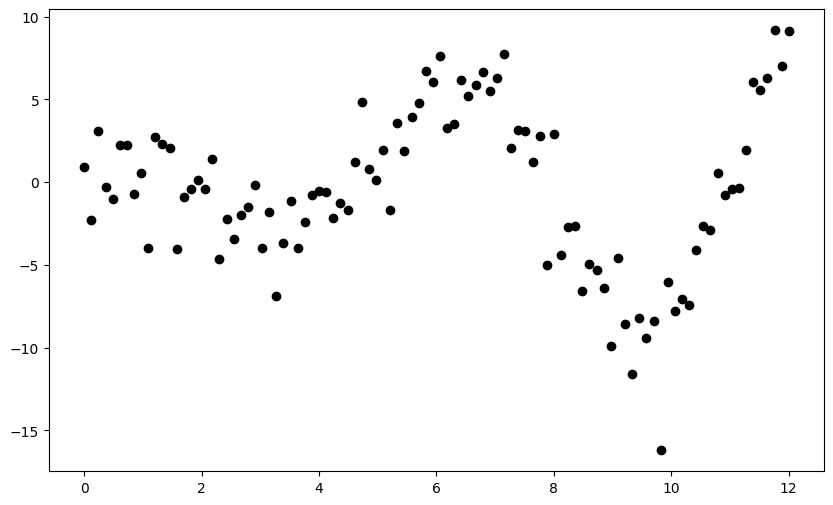

In [71]:
# Your code here
fig, ax = plt.subplots(figsize=(10, 6))

models = [results_2, results_4, results_8]
data = [x_2, x_4, x_8]
colors = ['yellow', 'lightgreen', 'cyan']

ax.scatter(x, y, label="data points", color="black")
for i, model in enumerate(models):
    ax.plot(
        x, # plot same x values for every model
        model.predict(data[i]), # generate predictions using relevant preprocessed data
        label=f"polynomial degree {(i + 1)*2}", # degree happens to be 2 times (i + 1)
        color=colors[i], # select color from list declared earlier
        linewidth=5,
        alpha=0.7
    )
    
ax.legend();




### Interpret Findings

Based on the metrics as well as the graphs, which model do you think is the best? Why?

In [ ]:
# Your written answer here


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
The quadratic model (polynomial degree 2) is definitely not the best based on all of the evidence we have. It has the worst R-Squared, the coefficient p-values are not significant, and you can see from the graph that there is a lot of variance in the data that it is not picking up on.

Our visual inspection aligns with the worse R-Squared for the 4th degree polynomial compared to the 8th degree polynomial. The 4th degree polynomial is flatter and doesn't seem to capture the extremes of the data as well.
    
However if we wanted to interpret the coefficients, then only the 4th degree polynomial has statistically significant results. The interpretation would be challenging because of the number of terms, but we could apply some calculus techniques to describe inflection points.

Overall it appears that this dataset is not particularly well suited to an inferential linear regression approach, even with polynomial transformations. So the "best" model could be either the 4th or 8th degree polynomial depending on which aspect of the model is more important to you, but either way it will be challenging to translate it into insights for stakeholders.
    
</details>

## Summary

Great job! You now know how to include polynomials in your linear models as well as the limitations of applying polynomial regression. 